In [2]:
 import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_used = pd.read_csv('/content/drive/MyDrive/sss/sentences.tsv', sep='\t')

In [5]:
df_used.columns

Index(['client_id', 'file', 'sentence', 'up_votes', 'down_votes', 'age',
       'gender', 'accent', 'locale', 'segment'],
      dtype='object')

In [6]:
df_mozilla = pd.read_csv('/content/drive/MyDrive/sss/train.tsv', sep='\t')

In [7]:
df_mozilla.columns

Index(['client_id', 'path', 'sentence', 'up_votes', 'down_votes', 'age',
       'gender', 'accent', 'locale', 'segment'],
      dtype='object')

In [8]:
df_used.reset_index(drop=True).equals(df_mozilla.reset_index(drop=True))

False

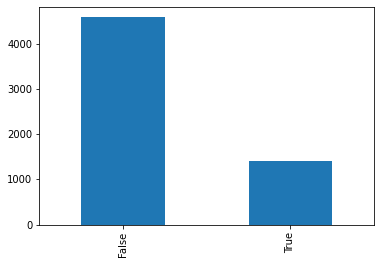

In [9]:
df_used['file'].isin(df_mozilla['path']).value_counts().plot(kind='bar')

In [10]:
df_used['file'].isin(df_mozilla['path']).value_counts(normalize=True).mul(100)

False    76.45
True     23.55
Name: file, dtype: float64

In [12]:
df_duplicates = set(df_used['file']).intersection(set(df_mozilla['path']))

In [21]:
df_repeat = list(df_duplicates)

In [29]:
df = pd.DataFrame(df_repeat, columns=['file'])

In [30]:
df.head()

,file
0,common_voice_pt_21824931.mp3
1,common_voice_pt_19711270.mp3
2,common_voice_pt_20431817.mp3
3,common_voice_pt_19547717.mp3
4,common_voice_pt_20432089.mp3


In [41]:
df_used = df_used.drop(columns=['client_id', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'])

In [42]:
df_used.head()

,file,sentence
0,common_voice_pt_20682151.mp3,Esta frase foi feita especificamente para você.
1,common_voice_pt_20682528.mp3,Isso seria engraçado se ele fizesse.
2,common_voice_pt_20681111.mp3,Meu gato deitado lá? absorvendo a luz do sol.
3,common_voice_pt_20682217.mp3,Um homem com brincos cortando o cabelo de outr...
4,common_voice_pt_20681212.mp3,Esta afirmação é completamente falsa.


In [47]:
frames = [df_used, df]

In [48]:
result = pd.concat(frames)

In [54]:
result.head()

,file,sentence
0,common_voice_pt_20682151.mp3,Esta frase foi feita especificamente para você.
1,common_voice_pt_20682528.mp3,Isso seria engraçado se ele fizesse.
2,common_voice_pt_20681111.mp3,Meu gato deitado lá? absorvendo a luz do sol.
3,common_voice_pt_20682217.mp3,Um homem com brincos cortando o cabelo de outr...
4,common_voice_pt_20681212.mp3,Esta afirmação é completamente falsa.


In [58]:
df_normalized = result.drop_duplicates(subset='file', keep=False)

In [59]:
df_normalized.to_csv('/content/drive/MyDrive/sss/Mozilla_Normalized/normalizedDS.csv')